# Πλάγια βολή με αντίσταση αέρα

Ζητάμε να βρούμε την κίνηση ενός σώματος που βάλλεται με γωνία $\theta$ ώς προς τον ορίζοντα, όταν δέχεται εκτός από το βάρος του και τη δύναμη της αντίστασης του αέρα $\vec F' = -b\vec v$.

Επομένως στον $x$ άξονα θα ισχύει $$m a_x = -bv_x$$ ενώ στον $y$ άξονα $$ma_y = -bv_y - mg$$

Αυτές είναι δύο διαφορικές εξισώσεις που γράφονται ως:
$$\dfrac{d^2x}{dt^2} = -\dfrac{b}{m}\dfrac{dx}{dt}$$
$$\dfrac{d^2y}{dt^2} = -\dfrac{b}{m}\dfrac{dy}{dt} - g$$

Για την λύση τους θα χρησιμοποιήσουμε την συνάρτηση odeint από το πακέτο scipy της python, και θα λύσουμε έτσι αριθμητικά τις διαφορικές μας.

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
from IPython.display import Latex
%matplotlib inline

In [2]:
#constants and initial conditions
m = 2               # kg
g = 9.81            # m/s^2
v0 = 30             # m/s
theta = np.pi/3     # rad

# initial conditions
vy0 = v0*np.sin(theta)
vx0 = v0*np.cos(theta)
y0 = 0
x0 = 0

In [3]:
# function that returns dx/dt and d^2x/dt^2
def dx(x, t, b) :
    # x[0] = x
    # x[1] = dx/dt = v_x
    return [x[1], (-b/m)*x[1]]

# function that returns dy/dt and d^2y/dt^2
def dy(y, t, b) :
    # y[0] = y 
    # y[1] = dy/dt =v_y
    return [y[1], (-b/m)*y[1] - g]

Οι αρχικές συνθήκες είναι $x=0$, αρχική ταχύτητα $v_0=60$m/s

Οι συνιστώσες της $v_{x0}=v_x\cos\theta$ ενώ για τον $y$ άξονα $y=0$  και $v_{y0}=v_y\sin\theta$ 

In [4]:
# time points
dy0 = [y0, vy0]
dx0 = [x0, vx0]
print('Εδώ :')
display(Latex('$y = $ {0}, $v_{{y0}} = $ {1:.1f}'.format(dy0[0], dy0[1])))
display(Latex('$x = $ {0}, $v_{{x0}} = $ {1:.1f}'.format(dx0[0], dx0[1])))


Εδώ :


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
# solve ODEs for varius constants b
t = np.linspace(0,6,51)
print(t)

[0.   0.12 0.24 0.36 0.48 0.6  0.72 0.84 0.96 1.08 1.2  1.32 1.44 1.56
 1.68 1.8  1.92 2.04 2.16 2.28 2.4  2.52 2.64 2.76 2.88 3.   3.12 3.24
 3.36 3.48 3.6  3.72 3.84 3.96 4.08 4.2  4.32 4.44 4.56 4.68 4.8  4.92
 5.04 5.16 5.28 5.4  5.52 5.64 5.76 5.88 6.  ]


In [6]:
#perfect trajectory
b = 0.0
ys1 = odeint(dy, dy0, t, args=(b,))
xs1 = odeint(dx, dx0, t, args=(b,))
x1 = xs1[:,0]
vx1 = xs1[:,1]
y1 = ys1[:,0]
vy1 = ys1[:,1]
# varius b constants
b2 = 0.1
ys2 = odeint(dy, dy0, t, args=(b2,))
xs2 = odeint(dx, dx0, t, args=(b2,))
x2 = xs2[:,0]
vx2 = xs2[:,1]
y2 = ys2[:,0]
vy1 = ys1[:,1]
b3 = 0.3
ys3 = odeint(dy, dy0, t, args=(b3,))
xs3 = odeint(dx, dx0, t, args=(b3,))
x3 = xs3[:,0]
vx3 = xs3[:,1]
y3 = ys3[:,0]
vy3 = ys3[:,1]
b4 = 0.8
ys4 = odeint(dy, dy0, t, args=(b4,))
xs4 = odeint(dx, dx0, t, args=(b4,))
x4 = xs4[:,0]
vx4 = xs4[:,1]
y4 = ys4[:,0]
vy4 = ys4[:,1]

In [7]:
display(Latex('Αρχική ταχύτητα $v_0 =$ {0} m/s. Angle of Projection $\\theta =$ {1:.1f}'.format(v0, math.degrees(theta))))
display(Latex('$v_x =$ {:.1f} m/s'.format(vx0)))
display(Latex('$v_y =$ {:.1f} m/s'.format(vy0)))
Latex('$b =$ {0}'.format(b2))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

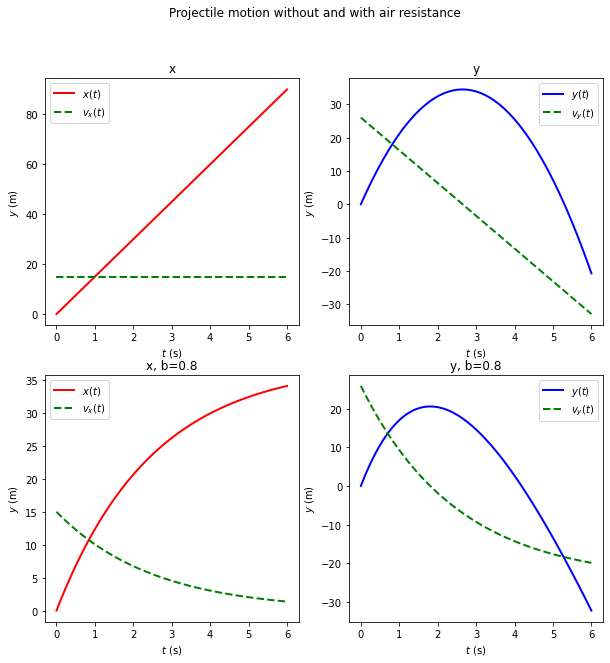

In [8]:
# plot results
plt.rcParams["figure.figsize"] = (10,10)
#plt.ylim(0,40)
#plt.xlim(0,8)

# Creates four subplots and unpacks the output array immediately
f, ax = plt.subplots(2, 2) #, sharey=True
#f.title('Πλάγια βολή με αντίσταση αέρα $F=-bv$')
#ax[0,0] = plt.axes(xlim=(0, 8), ylim=(0, 40))
ax[0,0].plot(t, x1, 'r',linewidth=2,label='$x(t)$')
ax[0,0].plot(t, vx1, 'g--', linewidth=2,label='$v_x(t)$')
ax[0,0].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[0,0].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
ax[0,0].set_title('x')
ax[0,0].legend()
#ax[0,1] = plt.axes(xlim=(0, 8), ylim=(0, 40))
ax[0,1].plot(t, y1,'b',linewidth=2,label='$y(t)$')
ax[0,1].plot(t, vy1, 'g--', linewidth=2,label='$v_y(t)$')
ax[0,1].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[0,1].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
ax[0,1].set_title('y')
ax[0,1].legend()
ax[1,0].plot(t, x4,'r',linewidth=2,label='$x(t)$')
ax[1,0].plot(t, vx4,'g--', linewidth=2,label='$v_x(t)$')
ax[1,0].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[1,0].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
#ax[1,0] = plt.axes(xlim=(0, 8), ylim=(0, 40))
ax[1,0].set_title('x, b=0.8')
ax[1,0].legend()
ax[1,1].plot(t, y4,'b',linewidth=2,label='$y(t)$')
ax[1,1].plot(t, vy4, 'g--', linewidth=2,label='$v_y(t)$')
ax[1,1].set(xlabel="$t$ (s)", ylabel="$x$ (m)")
ax[1,1].set(xlabel="$t$ (s)", ylabel="$y$ (m)")
#ax[1,1] = plt.axes(xlim=(0, 8), ylim=(0, 40))
ax[1,1].set_title('y, b=0.8')
ax[1,1].legend()
plt.suptitle("Projectile motion without and with air resistance")
#plt.savefig('projectile.png')
plt.show()

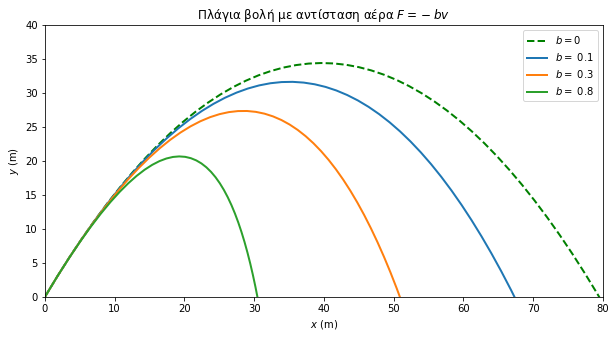

In [9]:
# plot results
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Πλάγια βολή με αντίσταση αέρα $F=-bv$')
plt.ylim(0,40)
plt.xlim(0,80)
plt.plot(x1,y1,'g--',linewidth=2,label='$b = 0$')
plt.plot(x2,y2,linewidth=2,label='$b = $ {0}'.format(b2))
plt.plot(x3,y3,linewidth=2,label='$b = $ {0}'.format(b3))
plt.plot(x4,y4,linewidth=2,label='$b = $ {0}'.format(b4))

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.legend()
plt.savefig('projectile.png')
plt.show()


Και να κάνουμε και ένα gif αρχείο με animation στην οριζόντια βολή μας!

In [10]:
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

# Config to put the animation on the jupyter notebook
plt.rcParams['animation.html'] = 'html5'

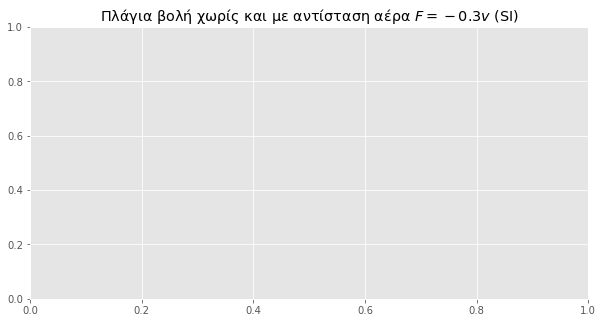

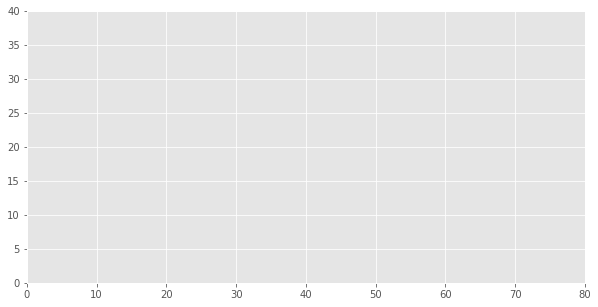

In [16]:
plt.rcParams["figure.figsize"] = (10,5)
plt.title('Πλάγια βολή χωρίς και με αντίσταση αέρα $F=-0.3v$ (SI)')
fig = plt.figure()
ax = plt.axes(xlim=(0, 80), ylim=(0, 40))
line, = ax.plot([], [],  'r-', lw=2, label = 'b=0')
line2, = ax.plot([], [], 'b-', lw=2, label = 'b=0.3')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

In [17]:
def init():
    line.set_data([], [])
    time_text.set_text('')
    #line1.set_data([], [])
    line2.set_data([], [])
    return line, line2, time_text

def animate(i):
    x = x1[0:i]
    y = y1[0:i]
    # draw a red dot
    ax.plot(x, y, 'ro')
    line.set_data(x, y)
    x_1 = x3[0:i]
    y_1 = y3[0:i]
    # draw a blue dot
    ax.plot(x_1, y_1, 'bo')
    line2.set_data(x_1, y_1)
    time_text.set_text('t = %.2f s' % (0.12 * i))
    ax.legend()
    return line, line2, time_text

In [18]:
anim = FuncAnimation(fig, animate, init_func=init, 
                               frames=51, interval=120, repeat=True)

In [19]:
anim.save('projectile.gif', writer='imagemagick')

In [14]:
anim